# 📈 Análise de Dados Financeiros com Python

## Contexto do Projeto
Neste projeto, realizo uma análise exploratória e temporal de dados financeiros utilizando Python, com foco na compreensão do comportamento de preços de um ativo ao longo do tempo.

O dataset foi obtido a partir do **Yahoo Finance**, contendo informações históricas de preços e volume negociado do ativo **AAPL (Apple Inc.)**, no período de **2020 a 2026**.

As principais variáveis analisadas incluem:
- Preço de abertura (Open)
- Preço máximo (High)
- Preço mínimo (Low)
- Preço de fechamento (Close)
- Volume negociado (Volume)

## Objetivo do Estudo
O objetivo deste estudo é identificar **padrões temporais**, **tendências de preço** e **comportamentos relevantes** do ativo financeiro ao longo do tempo, utilizando técnicas de manipulação de dados, séries temporais e visualização gráfica com Python.


---
## Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

---
## Carregamento do Dataset

In [2]:
df = pd.read_csv("dataset_financeiro.csv")

df.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,71.476615,72.528597,71.223274,72.468277,135480400
1,2020-01-03,71.696144,72.523731,71.539314,71.763702,146322800
2,2020-01-06,70.885450,72.374139,70.634517,72.335533,118387200
3,2020-01-07,72.345181,72.600937,71.775766,71.995331,108872000
4,2020-01-08,71.698566,73.455080,71.698566,73.153481,132079200


---
## Exploração Inicial dos Dados

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume
1503,2025-12-24,272.339996,275.429993,272.200012,273.809998,17910600
1504,2025-12-26,274.160004,275.369995,272.859985,273.399994,21521800
1505,2025-12-29,272.690002,274.359985,272.350006,273.760010,23715200
1506,2025-12-30,272.809998,274.079987,272.279999,273.079987,22139600
1507,2025-12-31,273.059998,273.679993,271.750000,271.859985,27293600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1508 non-null   object 
 1   Open    1508 non-null   float64
 2   High    1508 non-null   float64
 3   Low     1508 non-null   float64
 4   Close   1508 non-null   float64
 5   Volume  1508 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 70.8+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1508.000000,1508.000000,1508.000000,1508.000000,1.508000e+03
mean,164.780464,166.626006,163.090831,164.941638,8.453734e+07
std,49.675497,50.009971,49.377984,49.718656,5.136424e+07
min,55.161608,55.263186,51.420157,54.264336,1.791060e+07
25%,131.827880,132.882519,130.058087,131.422031,5.075645e+07
50%,163.605626,165.479059,162.070760,163.347031,7.040210e+07
75%,196.925664,199.490341,194.708278,197.564423,1.005718e+08
max,286.200012,288.619995,283.299988,286.190002,4.265100e+08


---
## Tratamento da Série Temporal

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1508 non-null   datetime64[ns]
 1   Open    1508 non-null   float64       
 2   High    1508 non-null   float64       
 3   Low     1508 non-null   float64       
 4   Close   1508 non-null   float64       
 5   Volume  1508 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 70.8 KB


In [7]:
# Definição de índice temporal
df.set_index("Date", inplace=True)

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,71.476615,72.528597,71.223274,72.468277,135480400
2020-01-03,71.696144,72.523731,71.539314,71.763702,146322800
2020-01-06,70.885450,72.374139,70.634517,72.335533,118387200
2020-01-07,72.345181,72.600937,71.775766,71.995331,108872000
2020-01-08,71.698566,73.455080,71.698566,73.153481,132079200


---
## Verificação da Qualidade dos Dados

In [8]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

---
## Visualização inicial

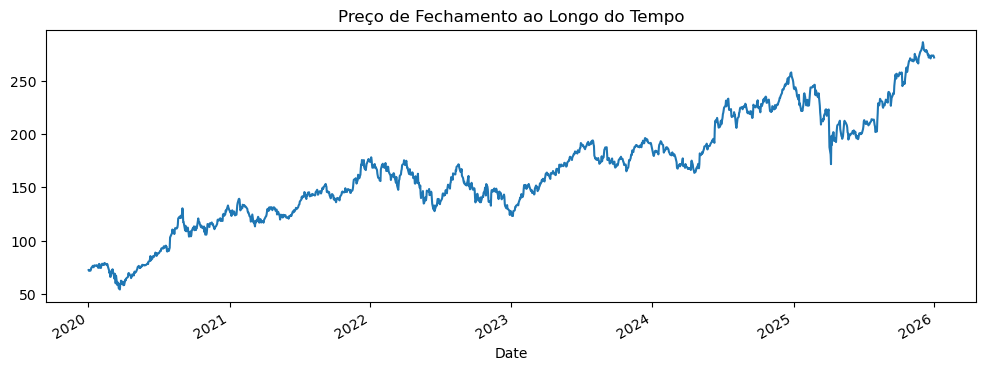

In [10]:
df["Close"].plot(figsize=(12, 4), title="Preço de Fechamento ao Longo do Tempo")
plt.show()

---
## Ordenação temporal explícita

In [11]:
df = df.sort_index()

---
## Criação das variáveis

In [12]:
# Variação absoluta
df["Variacao_Absoluta"] = df["Close"].diff()

In [13]:
## Retorno diário (%)
df["Retorno_Diario"] = df["Close"].pct_change() * 100

---
## Validação das métricas criadas

In [14]:
df[["Close", "Variacao_Absoluta", "Retorno_Diario"]].head()

,Close,Variacao_Absoluta,Retorno_Diario
Date,,,
2020-01-02,72.468277,NaN,NaN
2020-01-03,71.763702,-0.704575,-0.972252
2020-01-06,72.335533,0.571831,0.796824
2020-01-07,71.995331,-0.340202,-0.470312
2020-01-08,73.153481,1.158150,1.608646


---
## Estatísticas descritivas das métricas

In [15]:
df[["Variacao_Absoluta", "Retorno_Diario"]].describe()

,Variacao_Absoluta,Retorno_Diario
count,1507.000000,1507.000000
mean,0.132310,0.107773
std,2.992076,2.003810
min,-20.629456,-12.864714
25%,-1.319408,-0.820940
50%,0.174927,0.113998
75%,1.631741,1.146419
max,26.339920,15.328841


---
## Visualização simples do retorno diário

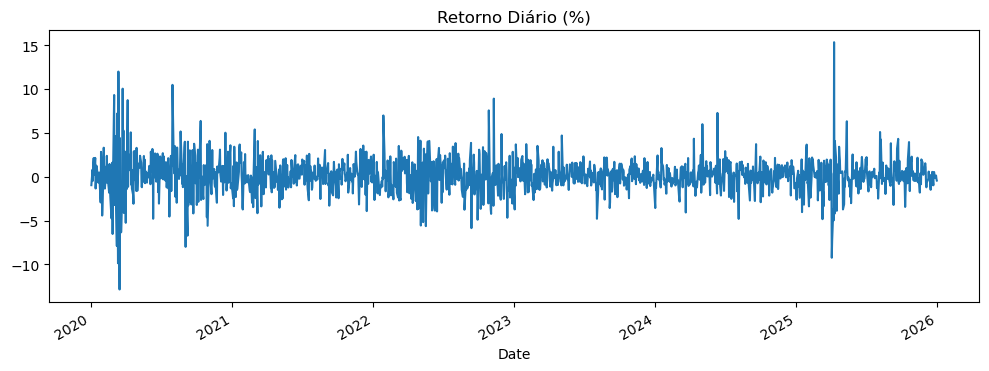

In [16]:
df["Retorno_Diario"].plot(
    figsize=(12, 4),
    title="Retorno Diário (%)"
)
plt.show()

---
## Visualização completa do preço de fechamento

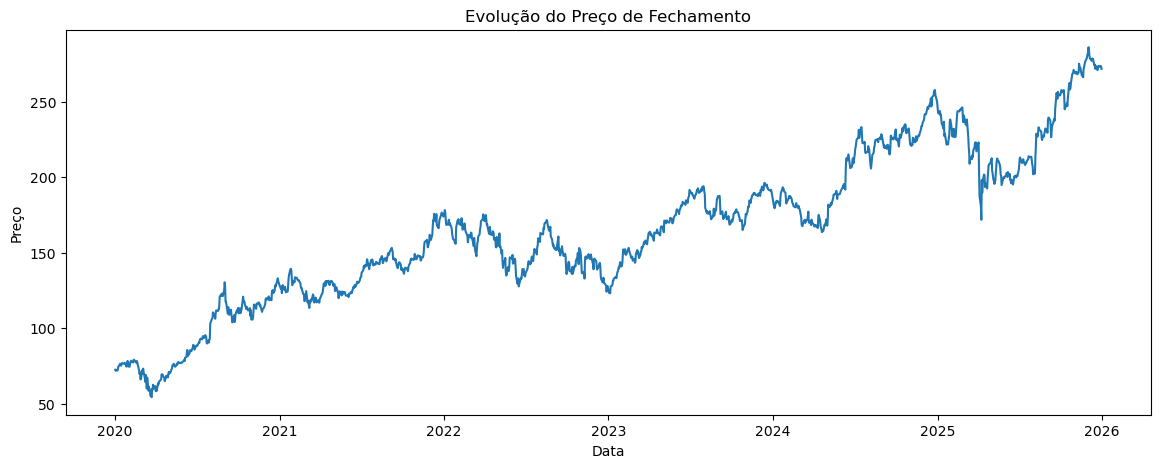

In [17]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["Close"])
plt.title("Evolução do Preço de Fechamento")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.show()

---
## Criação das médias móveis

In [18]:
df["MM7"] = df["Close"].rolling(window=7).mean()
df["MM21"] = df["Close"].rolling(window=21).mean()
df["MM50"] = df["Close"].rolling(window=50).mean()

---
## Preço vs médias móveis

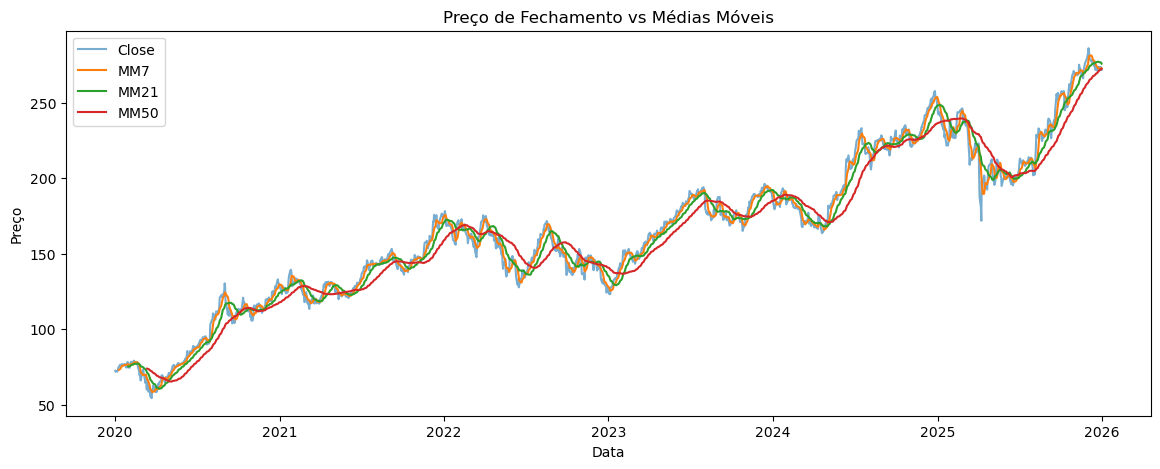

In [19]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["Close"], label="Close", alpha=0.6)
plt.plot(df.index, df["MM7"], label="MM7")
plt.plot(df.index, df["MM21"], label="MM21")
plt.plot(df.index, df["MM50"], label="MM50")

plt.title("Preço de Fechamento vs Médias Móveis")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.legend()
plt.show()

---
## Análise do volume negociado

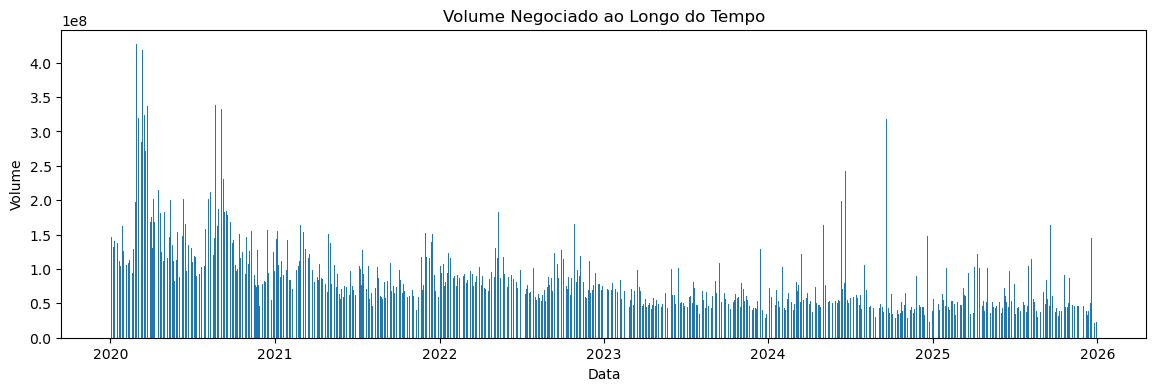

In [20]:
plt.figure(figsize=(14, 4))
plt.bar(df.index, df["Volume"])
plt.title("Volume Negociado ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Volume")
plt.show()

### Conclusão da Análise de Tendência
A análise do preço de fechamento em conjunto com as médias móveis indica uma tendência de alta bem definida no longo prazo. As correções observadas ao longo do período não comprometem a estrutura principal do movimento, funcionando como ajustes naturais do mercado.

As médias móveis, especialmente a MM21 e a MM50, atuam como referências importantes de tendência, enquanto a MM7 reflete oscilações de curto prazo. O volume negociado reforça movimentos relevantes de preço, sem apresentar sinais de distribuição prolongada.

---
## Análise de Retorno e Volatilidade

### Retorno Diário

In [23]:
df["Daily_Return"] = df["Close"].pct_change()

df.head()

,Open,High,Low,Close,Volume,Variacao_Absoluta,Retorno_Diario,MM7,MM21,MM50,Daily_Return
Date,,,,,,,,,,,
2020-01-02,71.476615,72.528597,71.223274,72.468277,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.696144,72.523731,71.539314,71.763702,146322800,-0.704575,-0.972252,NaN,NaN,NaN,-0.009723
2020-01-06,70.885450,72.374139,70.634517,72.335533,118387200,0.571831,0.796824,NaN,NaN,NaN,0.007968
2020-01-07,72.345181,72.600937,71.775766,71.995331,108872000,-0.340202,-0.470312,NaN,NaN,NaN,-0.004703
2020-01-08,71.698566,73.455080,71.698566,73.153481,132079200,1.158150,1.608646,NaN,NaN,NaN,0.016086


In [25]:
df["Daily_Return"].describe()

count    1507.000000
mean        0.001078
std         0.020038
min        -0.128647
25%        -0.008209
50%         0.001140
75%         0.011464
max         0.153288
Name: Daily_Return, dtype: float64

**Análise:**  
As estatísticas dos retornos diários fornecem uma visão quantitativa do risco e do comportamento médio do ativo ao longo do período analisado.

---

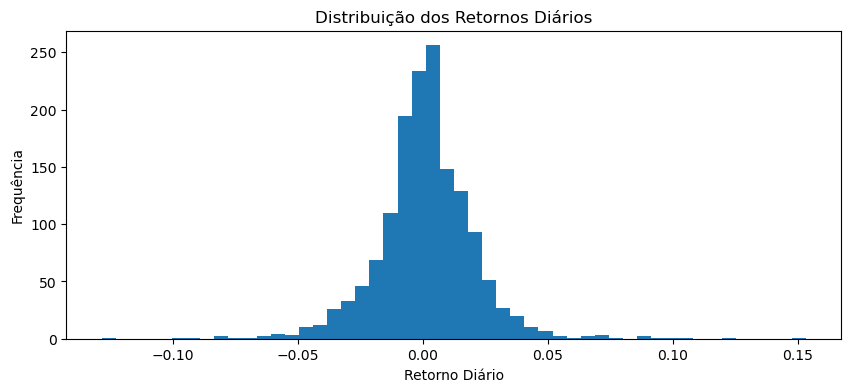

In [26]:
plt.figure(figsize=(10, 4))
plt.hist(df["Daily_Return"].dropna(), bins=50)
plt.title("Distribuição dos Retornos Diários")
plt.xlabel("Retorno Diário")
plt.ylabel("Frequência")
plt.show()

**Análise:**  
A distribuição dos retornos permite avaliar a dispersão, assimetria e presença de eventos extremos, fundamentais para análise de risco.

---

In [27]:
df["Volatility_20"] = df["Daily_Return"].rolling(window=20).std()

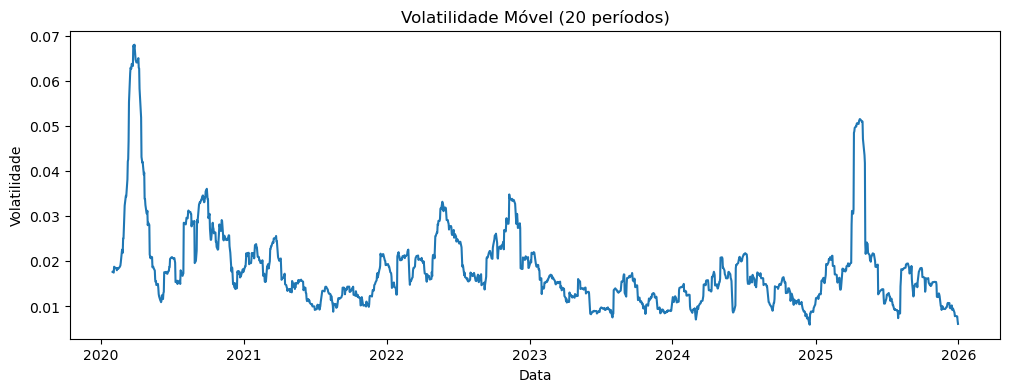

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["Volatility_20"])
plt.title("Volatilidade Móvel (20 períodos)")
plt.xlabel("Data")
plt.ylabel("Volatilidade")
plt.show()

**Análise:**  
A volatilidade móvel evidencia períodos de maior e menor risco, permitindo identificar momentos de instabilidade no mercado.
